# Solving an IVP (again)

We are now considering an IVP of a more general form:
$$ \theta'' = f(t,\theta, \theta'), \theta(0) = v_1, \theta'(0) = v_2.$$
This time, we will make no assumption on $f$, it can be any function. The first step is to transform this second order ODE in a first order ODE in two dimensions with a few change of variables:
$$y = \begin{pmatrix}y_1 \\ y_2\end{pmatrix}= \begin{pmatrix}\theta \\ \theta'\end{pmatrix} \Rightarrow y' = \begin{pmatrix}y_2\\ f(t,y_1,y_2)\end{pmatrix}$$

Then, we use Euler's method to solve it numerically by discretizing the time. If we denote the variable $y^k$ to be the value of $y$ at timestep $k$, Euler's method consists of approximating the next value with the following formula:
$$ y^{k+1} = y^{k} + \varepsilon \cdot f(y^k),$$
where $\varepsilon$ is the length of the timestep.

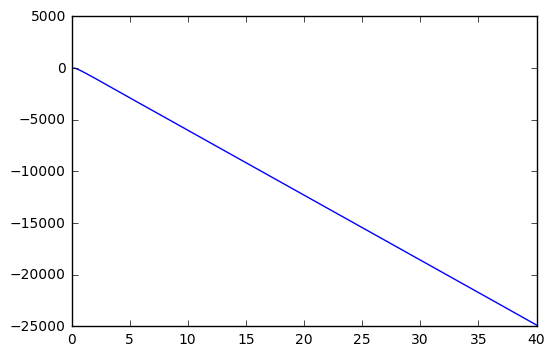

In [41]:
## - Modules - ##
import numpy as np
import matplotlib.pyplot as plt

## - Constants - ##
t_end = 40 # ending time of the simulation (t_start = 0)
steps = 8000
domain = np.linspace(0,t_end,steps)
eps = t_end/steps # value of epsilon (the time quantum)
epsq = eps*eps # epsilon^2
g = 9.8
ell = 8.69
mu = 1.29
Cx = 0.7
m = 12000
k = 2.5
alpha = g/ell
v_1 = 0 #initial value theta(0)
v_2 = 0.5 #initial value theta'(0)

## - Defining functions - ##
def S(t):
    # Surfact of cabin that is exposed to wind
    return 15.63
def v2(t):
    # Speed of wind
    return 30
def Fx(t):
    #This is the function Fx:
    return 0.5*mu*S(t)*v2(t)*Cx 
def lengthSpring(t):
    #This is the length of the spring:
    return (np.sin(20*t)+1)*5
    
def fct(t,theta, thetaP):
    #Function that takes t, theta and theta' to compute theta''
    return (Fx(t)*np.cos(theta)-m*g*np.sin(theta)+k*(lengthSpring(t)-lengthSpring(0))*np.cos(theta))/ell

## - Solving - ##  
y = [np.array((v_1,v_2))] # this is y^0
for k in range(0,steps-1): # We do this as many times as the interval is divided
    y_next = y[-1] + np.array((eps*y[-1][1], eps*fct(k*eps, y[-1][0], y[-1][1]))) # Euler's method to calculate next y
    y.append(y_next) # add this value to the array

solution = [x[0] for x in y] # Only interested in the first value theta
#plotting the solution
plt.plot(domain, solution)
plt.show()